In [18]:
import pandas as pd
import numpy as np
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
w=pd.read_csv('/Users/hannahkamen/Downloads/w_rpt.csv')
y=pd.read_csv('/Users/hannahkamen/Downloads/y_rpt.csv')
pl=pd.read_csv('/Users/hannahkamen/Downloads/pl_rpt.csv')
pc=pd.read_csv('/Users/hannahkamen/Downloads/pc_rpt.csv')


In [9]:
y.head()

,file,pct,region,sector,value
0,staticmodel_v6_0.02,0.02,IA,ppd,2.657069
1,staticmodel_v6_0.02,0.02,IA,res,5.682975
2,staticmodel_v6_0.02,0.02,IA,com,1.877242
3,staticmodel_v6_0.02,0.02,IA,amb,8.295665
4,staticmodel_v6_0.02,0.02,IA,fbp,29.525095


In [10]:
w.head()

,file,pct,region,household,skill,value
0,staticmodel_v6_0.02,0.02,IA,hh1,skl,0.999941
1,staticmodel_v6_0.02,0.02,IA,hh1,unskl,1.000375
2,staticmodel_v6_0.02,0.02,IA,hh2,skl,0.999834
3,staticmodel_v6_0.02,0.02,IA,hh2,unskl,1.000485
4,staticmodel_v6_0.02,0.02,IA,hh3,skl,0.999808


In [12]:
pl.head()

,file,pct,region,skill,value
0,staticmodel_v6_0.02,0.02,IA,skl,0.999767
1,staticmodel_v6_0.02,0.02,IA,unskl,1.000714
2,staticmodel_v6_0.02,0.02,FL,skl,0.999791
3,staticmodel_v6_0.02,0.02,FL,unskl,1.000689
4,staticmodel_v6_0.02,0.02,MD,skl,0.999699


In [13]:
pc.head()

,file,pct,region,household,skill,value
0,staticmodel_v6_0.02,0.02,IA,hh1,skl,1.000033
1,staticmodel_v6_0.02,0.02,IA,hh1,unskl,1.000033
2,staticmodel_v6_0.02,0.02,IA,hh2,skl,1.000026
3,staticmodel_v6_0.02,0.02,IA,hh2,unskl,1.000026
4,staticmodel_v6_0.02,0.02,IA,hh3,skl,1.000023


In [21]:
g=sns.color_palette("viridis", as_cmap=False)


In [25]:
plt.plot?

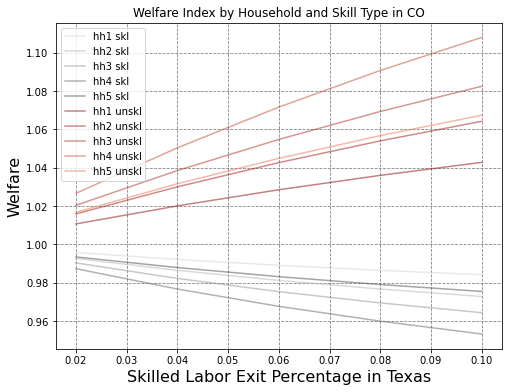

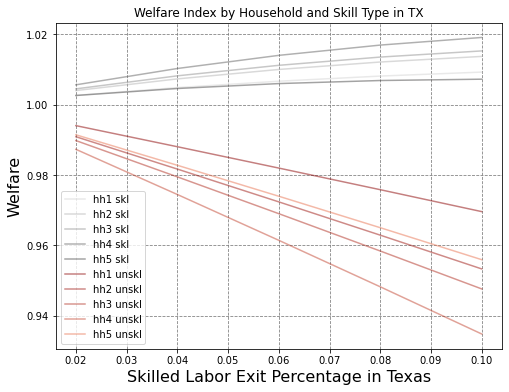

In [33]:
for state in ['CO','TX']:
    fig, ax = plt.subplots(1, 1,figsize=(8,6))
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')

    plt.xlabel('Skilled Labor Exit Percentage in Texas',fontsize=16)
    plt.ylabel('Welfare',fontsize=16)

    gr=['#D4D4D4', '#B4B4B4', '#909090','#636363','#494848']
    
    rd=['#8B0001', '#9E1711', '#B12E21', '#C34632','#E97452']

    for sk,c in zip(['skl','unskl'],[gr,rd]):

        for hh,c in zip(['hh1','hh2','hh3','hh4','hh5'],c):

            tmp = w[(w['skill']==sk) & (w['region']==state) & (w['household']==hh)]
            tmp=tmp.sort_values(by='pct').reset_index()


            plt.plot(tmp['pct'], tmp['value'], c=c, alpha=0.5,label='%s %s'%(hh,sk))
            plt.legend()

            plt.title('Welfare Index by Household and Skill Type in %s'%state)

    plt.show()


In [39]:
pc.head()

,file,pct,region,household,skill,value
0,staticmodel_v6_0.02,0.02,IA,hh1,skl,1.000033
1,staticmodel_v6_0.02,0.02,IA,hh1,unskl,1.000033
2,staticmodel_v6_0.02,0.02,IA,hh2,skl,1.000026
3,staticmodel_v6_0.02,0.02,IA,hh2,unskl,1.000026
4,staticmodel_v6_0.02,0.02,IA,hh3,skl,1.000023


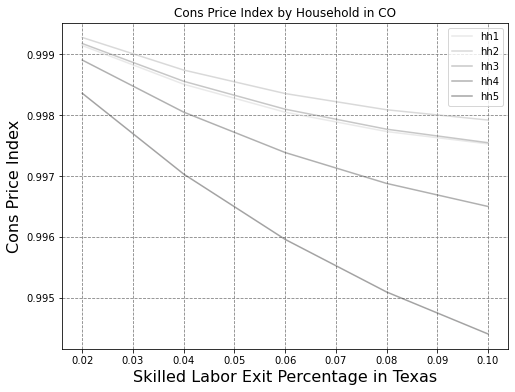

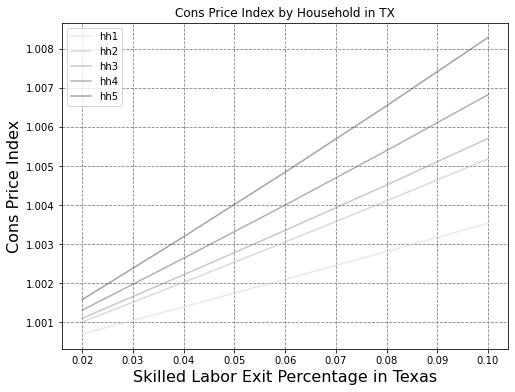

In [48]:
for state in ['CO','TX']:
    fig, ax = plt.subplots(1, 1,figsize=(8,6))
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')

    plt.xlabel('Skilled Labor Exit Percentage in Texas',fontsize=16)
    plt.ylabel('Cons Price Index',fontsize=16)

    gr=['#D4D4D4', '#B4B4B4', '#909090','#636363','#494848']
    
    rd=['#8B0001', '#9E1711', '#B12E21', '#C34632','#E97452']


    for hh,c in zip(['hh1','hh2','hh3','hh4','hh5'],gr):

        tmp = pc[(pc['skill']==sk) & (pc['region']==state) & (pc['household']==hh)]
        tmp=tmp.sort_values(by='pct').reset_index()


        plt.plot(tmp['pct'], tmp['value'], c=c, alpha=0.5,label='%s'%hh)
        plt.legend()

        plt.title('Cons Price Index by Household in %s'%state)

    plt.show()


In [47]:
y_gr.head()

,region,pct,value
0,AK,0.02,95.319204
1,AK,0.04,95.319204
2,AK,0.06,95.319204
3,AK,0.08,95.319204
4,AK,0.10,95.319204


In [46]:
y_gr=y.groupby(['region','pct'],as_index=False).sum()

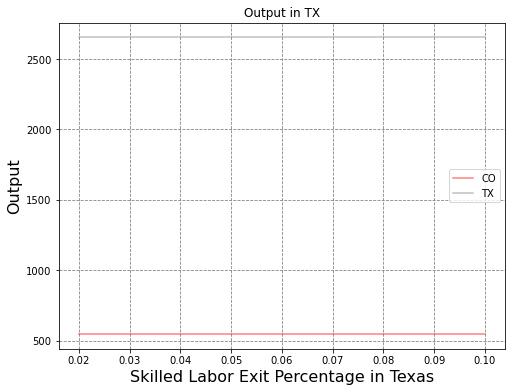

In [50]:

fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.xlabel('Skilled Labor Exit Percentage in Texas',fontsize=16)
plt.ylabel('Output',fontsize=16)

gr=['#D4D4D4', '#B4B4B4', '#909090','#636363','#494848']

rd=['#8B0001', '#9E1711', '#B12E21', '#C34632','#E97452']
    
for state,c in zip(['CO','TX'],['red','gray']):

    tmp = y_gr[y_gr['region']==state]
    tmp=tmp.sort_values(by='pct').reset_index()


    plt.plot(tmp['pct'], tmp['value'], c=c, alpha=0.5,label='%s'%state)
    plt.legend()

    plt.title('Output in %s'%state)

plt.show()

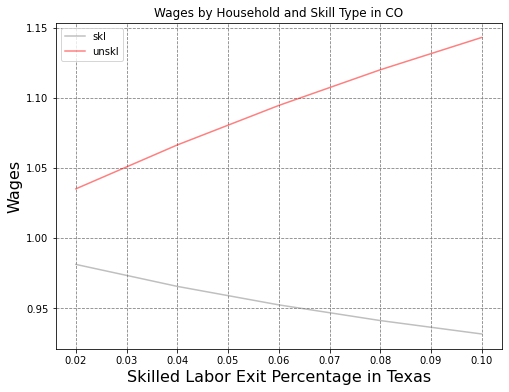

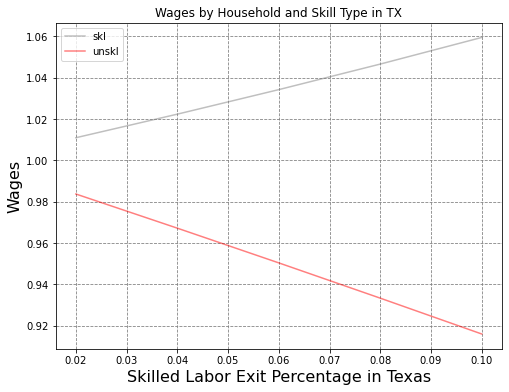

In [37]:
for state in ['CO','TX']:
    fig, ax = plt.subplots(1, 1,figsize=(8,6))
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')

    plt.xlabel('Skilled Labor Exit Percentage in Texas',fontsize=16)
    plt.ylabel('Wages',fontsize=16)

    gr=['#D4D4D4', '#B4B4B4', '#909090','#636363','#494848']
    
    rd=['#8B0001', '#9E1711', '#B12E21', '#C34632','#E97452']

    for sk,c in zip(['skl','unskl'],['gray','red']):

        tmp = pl[(pl['skill']==sk) & (pl['region']==state)]
        tmp=tmp.sort_values(by='pct').reset_index()


        plt.plot(tmp['pct'], tmp['value'], c=c, alpha=0.5,label='%s'%sk)
        plt.legend()

        plt.title('Wages by Household and Skill Type in %s'%state)

    plt.show()

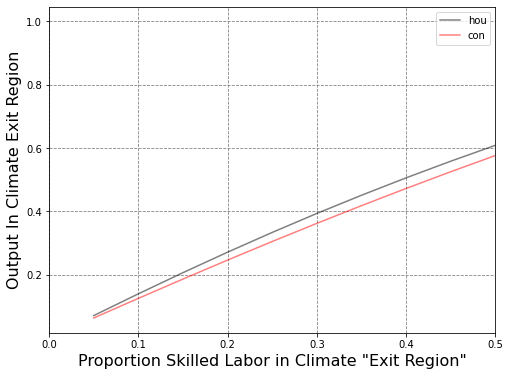

In [32]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.xlabel('Proportion Skilled Labor in Climate "Exit Region"',fontsize=16)
plt.ylabel('Output In Climate Exit Region',fontsize=16)
#pl_lm=pl[pl['prop_skl_s']<=.5]
   
for i,c in zip(['hou','con'],['black','red']):

    tmp = y[(y['industry']==i) & (y['region']=='s')]
    tmp=tmp.sort_values(by='prop_skl_s').reset_index()
    
    plt.xlim((0,.5))


    plt.plot(tmp['prop_skl_s'], tmp['value'], c=c, alpha=0.5,label=i)
    plt.legend()

plt.show()

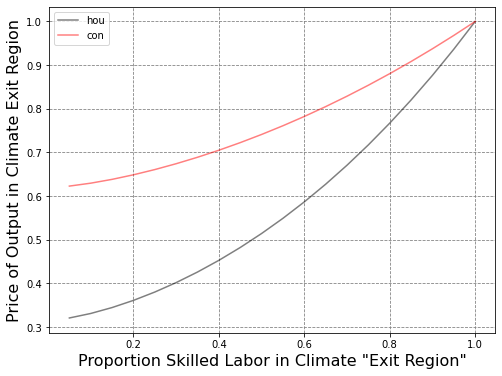

In [33]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.xlabel('Proportion Skilled Labor in Climate "Exit Region"',fontsize=16)
plt.ylabel('Price of Output in Climate Exit Region',fontsize=16)
py_lm=py[(py['prop_skl_s']!=.25) & (py['prop_skl_s']!=.6) & (py['prop_skl_s']!=.4)]
   
for i,c in zip(['hou','con'],['black','red']):

    tmp = py[(py['industry']==i) & (py['region']=='s')]
    tmp=tmp.sort_values(by='prop_skl_s').reset_index()
    

    plt.plot(tmp['prop_skl_s'], tmp['value'], c=c, alpha=0.5,label=i)
    plt.legend()

plt.show()

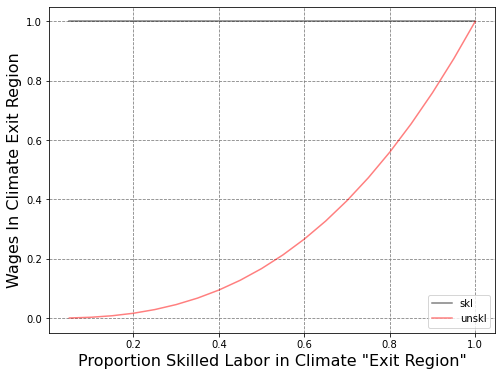

In [34]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.xlabel('Proportion Skilled Labor in Climate "Exit Region"',fontsize=16)
plt.ylabel('Wages In Climate Exit Region',fontsize=16)
pl_lm=pl[(pl['prop_skl_s']!=.2) & (pl['prop_skl_s']!=.35)]
   
for hh,c in zip(['skl','unskl'],['black','red']):

    tmp = pl[(pl['labor_type']==hh) & (pl['region']=='s')]
    tmp=tmp.sort_values(by='prop_skl_s').reset_index()


    plt.plot(tmp['prop_skl_s'], tmp['value'], c=c, alpha=0.5,label=hh)
    plt.legend()

plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(8,6))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

for r in ['n','s']:
    
    tmp = data[(data['region']==r)]
    
    for hh in ['skl','unskl']:
    
        tmp2 = tmp[(tmp['labor_type']==hh)]
        tmp2=tmp2.sort_values(by='prop_skl_s').reset_index()


        plt.xlabel('Proportion Skilled Labor in Climate "Exit Region"',fontsize=16)
        plt.ylabel('Welfare',fontsize=16)
        
        print(r,hh)

        plt.plot(tmp2['prop_skl_s'], tmp2['value'], c='red', alpha=0.5)
 

        plt.show()

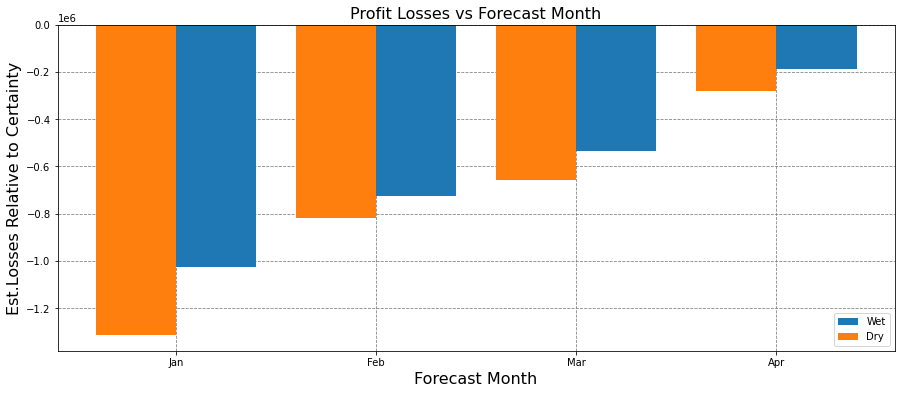

In [213]:
fig, ax = plt.subplots(1, 1,figsize=(15,6))
ax.set_axisbelow(True)


X=['Jan','Feb', 'Mar','Apr']
X_axis = np.arange(len(X))


plt.bar(X_axis + 0.2, predict_chart_w['Pct. Losses Relative to Forecast Certainty'],0.4,label='Wet')
plt.bar(X_axis - 0.2, predict_chart_d['Pct. Losses Relative to Forecast Certainty'],0.4,label='Dry')


ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')


plt.xticks(X_axis, X)

plt.legend()



plt.savefig('/Users/hannahkamen/Downloads/Losses from Imperfect Info CO Dry.png')
plt.xlabel('Forecast Month',fontsize=16)
plt.ylabel('Est.Losses Relative to Certainty',fontsize=16)
plt.title('Profit Losses vs Forecast Month',fontsize=16)


plt.show()